In [1]:
%config Completer.use_jedi = False  # enable code auto-completion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("datasets.csv") 
data.drop(['ID','redoxpot2','SMILES'], axis = 1, inplace=True) # drop unrelevant columns
data

,HomoA,LumoA,GapA,HomoAH,LumoAH,GapAH,HomoAH2,LumoAH2,GapAH2,redoxpot1
0,-7.9848,-3.6582,4.3265,-7.5462,-3.5189,4.0272,-6.0675,-0.4076,5.6599,0.9121
1,-6.6740,-3.3543,3.3197,-6.6104,-3.0729,3.5374,-5.8577,-0.2250,5.6327,0.8415
2,-6.3660,-3.3184,3.0476,-6.2117,-3.0280,3.1837,-5.9100,-0.3589,5.5510,0.8053
3,-7.1440,-3.6882,3.4558,-6.8373,-3.5720,3.2653,-5.9666,-0.4971,5.4694,0.9603
4,-7.5521,-3.5521,4.0000,-7.2218,-3.3578,3.8640,-5.9178,-0.1763,5.7415,0.8734
...,...,...,...,...,...,...,...,...,...,...
1984,-6.9374,-3.0191,3.9184,-6.7611,-3.0876,3.6735,-5.0583,-1.6841,3.3742,0.2191
1985,-7.0019,-3.0019,4.0000,-6.7845,-3.0294,3.7551,-5.0427,-1.6958,3.3470,0.1941
1986,-6.9309,-3.0125,3.9184,-6.7957,-3.0678,3.7279,-5.0055,-1.6313,3.3742,0.3965
1987,-6.8912,-3.0000,3.8912,-6.6754,-3.0291,3.6463,-5.0566,-1.7641,3.2925,0.1937


## Use Pandas Profiling for exploratory data analysis
Use Pandas Profiling to generate a report named *output.html*. This file contains the graphs of the correlations/relationships between features and label. Read more about Pandas Profiling [here](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3#:~:text=Pandas%20profiling%20is%20an%20open,a%20few%20lines%20of%20code.)

In [3]:
pip install pandas-profiling # install Pandas Profiling

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Generate the report
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
#data = dataset.sample(frac=1)   # randomize the data order

# Create the feature and label vectors
X = data.drop(columns = ['redoxpot1']).to_numpy()
y = data['redoxpot1'].to_numpy() # the goal is to predict the redox potential

# Split the dataset into a training set and a validation set 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

## Plot the correlation between features and label

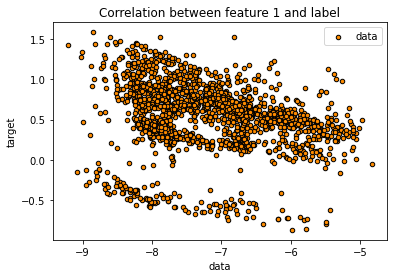

In [32]:
%matplotlib inline
plt.figure() # create a figure object
plt.scatter(X[:,0], y, s=20, edgecolor="black", c="darkorange", label="data") # original data
plt.xlabel("data")
plt.ylabel("target")
plt.title("Correlation between feature 1 and label")
plt.legend()
plt.show()

## Test with Decision Tree Regressor [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [35]:
reg = DecisionTreeRegressor(criterion='squared_error', max_depth=3)
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
train_error = reg.score(X_train, y_train)

y_pred_val = reg.predict(X_val)
val_error = reg.score(X_val, y_val)

display(train_error)
display(val_error)

0.6512261760463403

0.6260552015451581

## Visualizing the decision tree

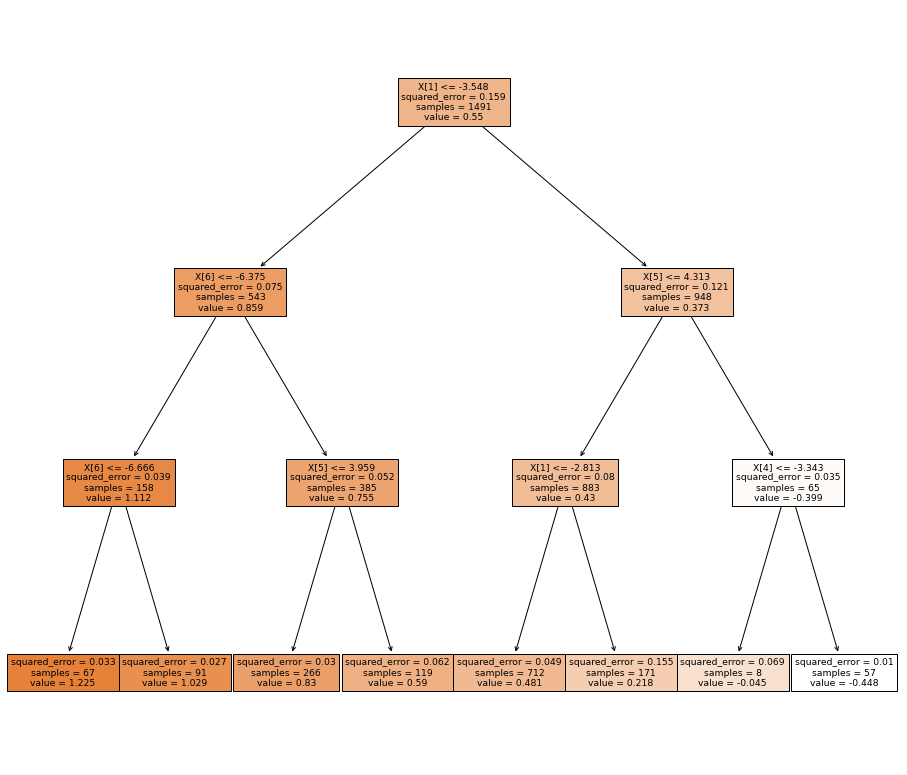

In [21]:
from sklearn.tree import plot_tree

# feature_cols = ["x" + str(i) for i in range(len(X[0,:]))] # for visualization

# Visualize the decision tree
plt.figure(figsize=(16,14))
plot_tree(reg, filled=True, feature_names=feature_cols)
plt.show()